In [1]:
polyEval(coeffs, pt) = sum([coeffs[i] * pt^(i-1) for i = 1:length(coeffs)])  

polyEval (generic function with 1 method)

In [10]:
using JSON

fcoeffs_Apr_AM = readall("../temp_files/fcoeffs_Apr_AM.json")
fcoeffs_Apr_AM = JSON.parse(JSON.parse(fcoeffs_Apr_AM))

fcoeffs_Apr_MD = readall("../temp_files/fcoeffs_Apr_MD.json")
fcoeffs_Apr_MD = JSON.parse(JSON.parse(fcoeffs_Apr_MD))

fcoeffs_Apr_PM = readall("../temp_files/fcoeffs_Apr_PM.json")
fcoeffs_Apr_PM = JSON.parse(JSON.parse(fcoeffs_Apr_PM))

fcoeffs_Apr_weekend = readall("../temp_files/fcoeffs_Apr_weekend.json")
fcoeffs_Apr_weekend = JSON.parse(JSON.parse(fcoeffs_Apr_weekend))

Dict{String,Any} with 4 entries:
  "fcoeffs5" => {0.07676740740173008,0.32144037853445534,0.5407674502859936,0.4…
  "fcoeffs3" => {0.23474626033165688,0.5662534004390608,0.45584648018370105,0.1…
  "fcoeffs6" => {0.0444673792128321,0.22476857410569936,0.4759323029075549,0.53…
  "fcoeffs4" => {0.13134319929472849,0.43796481292593326,0.5497686630731441,0.3…

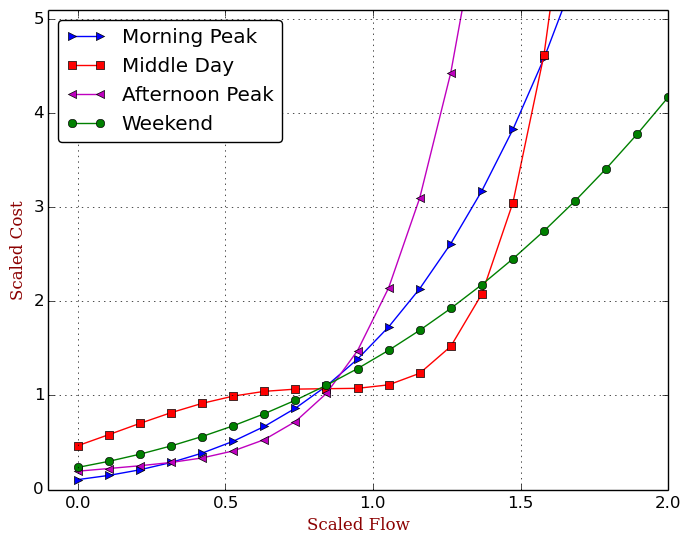

In [12]:
using PyPlot

fcoeffs_AM = fcoeffs_Apr_AM["fcoeffs6"]
fcoeffs_MD = fcoeffs_Apr_MD["fcoeffs7"]
fcoeffs_PM = fcoeffs_Apr_PM["fcoeffs6"]
fcoeffs_weekend = fcoeffs_Apr_weekend["fcoeffs3"]


xs = linspace(0, 2, 20)
#ys_true = map(x->polyEval(true_coeffs, x), xs)
#ys6 = map(x->polyEval(fcoeffs6, x), xs)
#ys7 = map(x->polyEval(fcoeffs7, x), xs)
ys_AM = map(x->polyEval(fcoeffs_AM, x), xs)
ys_MD = map(x->polyEval(fcoeffs_MD, x), xs)
ys_PM = map(x->polyEval(fcoeffs_PM, x), xs)
ys_weekend = map(x->polyEval(fcoeffs_weekend, x), xs)

# ys = map(x->polyEval(fcoeffs, x), xs)

#plot(xs, ys_true, "k", label="True")
#plot(xs, ys6, "o-c", label="deg=6")
#plot(xs, ys7, "s-r", label="deg=7")
plot(xs, ys_AM, ">-b", label="Morning Peak")
plot(xs, ys_MD, "s-r", label="Middle Day")
plot(xs, ys_PM, "<-m", label="Afternoon Peak")
plot(xs, ys_weekend, "o-g", label="Weekend")
legend(loc="upper left",fancybox="true") 
# plot(xs, ys, "--b")
grid("on")
xlim(-0.1, 2.0, 0.01);
ylim(0.0, 5.1, 0.01);

font1 = ["family"=>"serif",
    "color"=>"darkred",
    "weight"=>"normal",
    "size"=>12]
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("../temp_files/fitting_comparison_Apr.pdf")